In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression




    Error absoluto medio
mae = mean_absolute_error(Y, pred_Y)
    Error cuadrático medio
mse = mean_squared_error(Y, pred_Y)
    Raiz de error cuadrático medio
rmse = np.sqrt(mean_squared_error(Y, pred_Y))
    Coeficiente de determinación
r2 = r2_score(Y, pred_Y)



In [2]:
#Datos

X_train = pd.DataFrame({
    'hores_estudiades': [1.57, 9.05, 7.95, 6.96, 3.32, 4.96, 3.62, 8.76, 1.18],
    'motivacio': [93.87, 74.47, 83.88, 51.84, 64.24, 98.59, 65.90, 67.05, 64.49],
})

Y_train = pd.Series(name="nota", data=[63.25, 60.65, 71.27, 50.62, 44.36, 73.50, 51.59, 61.29, 50.41])

X_test = pd.DataFrame({
    'hores_estudiades': [9.56, 7.59, 2.64, 6.51, 2.26, 4.30, 1.42, 1.88, 7.98],
    'motivacio': [81.82, 65.72, 81.67, 90.37, 94.80, 55.50, 75.54, 85.15, 61.98],
})
Y_test = pd.Series(name="nota", data=[71.18, 59.50, 60.22, 67.81, 63.62, 50.48, 46.32, 48.76, 62.21])

In [4]:
#Declarar modelo regresion lineal
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [5]:
#coef_: coeficients de les variables independents
print(f'Coeficients: {model.coef_}')

#intercept_: terme independent de la recta
print(f'Intercept: {model.intercept_}')

Coeficients: [1.54284641 0.57396092]
Intercept: 8.061767639674514


In [6]:
#Realizar predicciones

pred_Y_test = model.predict(X_test)

In [8]:
#Evaluar modelo

mae = mean_absolute_error(Y_test, pred_Y_test)
mse = mean_squared_error(Y_test, pred_Y_test)
rmse = root_mean_squared_error(Y_test, pred_Y_test)
r2 = r2_score(Y_test, pred_Y_test)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')


MAE: 4.19
MSE: 27.56
RMSE: 5.25
R^2: 0.58


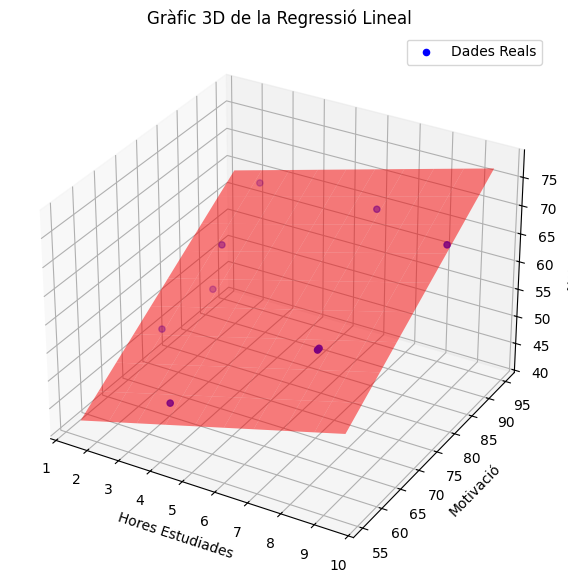

In [10]:
#Visualizar modelo

# Coeficients i intercept
b0 = model.intercept_
b1, b2 = model.coef_

# Crear el gràfic 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dades reals: scatter plot
ax.scatter(X_test['hores_estudiades'], X_test['motivacio'], Y_test, color='blue', label='Dades Reals')

# Crear una graella per a les variables independents
x1_range = np.linspace(X_test['hores_estudiades'].min(), X_test['hores_estudiades'].max(), 10)
x2_range = np.linspace(X_test['motivacio'].min(), X_test['motivacio'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predicció dels valors de Y per a la graella (plane de regressió)
y_grid = b0 + b1 * x1_grid + b2 * x2_grid

# Superfície de la regressió
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

# Etiquetes dels eixos
ax.set_xlabel('Hores Estudiades')
ax.set_ylabel('Motivació')
ax.set_zlabel('Nota Final')

# Títol i llegenda
ax.set_title('Gràfic 3D de la Regressió Lineal')
ax.legend()

plt.show()
